# Lab 0: Colorado Springs Weather & Climate Data Analysis & Visualization

This lab explores weather data from April 1948 through December 2022 collected at the Colorado Springs Municipal Airport (station 051778, 38.80949$^\circ$N, 104.6887$^\circ$W). Weather data from this station, at an elevation of 6,182 ft, is one of the longest observational records in the area. The data was accessed from the [Colorado Climate Center](https://climate.colostate.edu/data_access_new.html).

First you will analyze monthly and seasonal variations in minimum and maximum temperature, prcipitation, and snowfall. Then you will  calculate annual averages and explore long-term trends. All code and figures will be generated in this Jupyter Notebook using the Python programming language. Use comments (the `#` symbol) to organize your code and make it more readable.

Learning to code requires patience and practice! This notebook includes detailed instructions and sample code to help guide you through the process. Please systematically walk through the sample code and make sure you understand each line before proceeding.

**Required data:**
*CO_Springs_Airport_Monthly.csv* (Download from GitHub)

**To submit via Canvas:**

To foster a collaborative learning environment, you are encouraged to work with a partner, but each person must write and submit their own code, and answer all interpretation and synthesis questions in their own words. All students must complete all problems - it is against the honor code to divide the problems up among different individuals. 

- Prior to submitting your lab, please name your Notebook file using the following syntax: *LastName_FirstName_EV333_Lab0.ipynb.*
- Please run the notebook from the beginning to check it generates all figures and runs without any errors. Then upload your notebook to Canvas.

**Learning outcomes:** 
In this lab you will learn and practice the following skills:

- Interpreting local atmospheric observations
- Calculating the climatology for Colorado Springs
- Time series analysis
- Statistical analysis
- Manipulating data in Pandas DataFrames
- Data visualization with Matplotlib
- Describing the factors that influence weather and climate in Colorado Spring 

---

## Pre-process the data

The cells below import the necessary Python packages and load `CO_Springs_Airport_Monthly.csv` as a Pandas **DataFrame** called `df`. The DataFrame contains monthly averages of minimim and maximum temperature (in $^\circ$F), precipitation (in inches), and snowfall (in inches) from 1948-2022. Each column of data is a Series.

The goal of this lab is to practice manipulating and plotting the data, so the pre-processing steps are completed for you. Carefully go through each line of code to make sure you understand it. The processed `df` DataFrame is displayed. 

In [1]:
# import Python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import os

# disable warnings
pd.options.mode.chained_assignment = None

**Load the Colorado Springs weather and climate data:**

**<span style='color:Red'> Insert a cell below using the `+` icon.  </span> Add the following code:**

```
# file path and name, update with the path for your local computer
cwd = os. getcwd()
fileName = cwd+'/CO_Springs_Airport_Monthly.csv'
```

The `os.getcwd()` method from the Python os module will get the current working directory. You will need to change `cwd+'/CO_Springs_Airport_Monthly.csv` if you are storing the csv file in another directory on your computer. If this is the case, put the full path for the csv file in single quotes: `fileName = ''`.

In [2]:
# file path and name, update with the path for your local computer
cwd = os.getcwd()
fileName = cwd+'/Data/CO_Springs_Airport_Monthly.csv'

In [3]:
# load data as a Pandas DataFrame (df)
df = pd.read_csv(fileName)

# units for each column of data
df_units = df[:1]
print(df_units)

# remove units from the DataFrame
df = df[1:]

  Year_Month maximumT minimumT precipitation snowfall
0      Units     degF     degF            in       in


In [4]:
#convert numeric values to float 
# errors='coerce' sets any value that is not recognized as a numeric value to NaN
df['maximumT']      = pd.to_numeric(df['maximumT'],      errors='coerce').astype(np.float16)
df['minimumT']      = pd.to_numeric(df['minimumT'],      errors='coerce').astype(np.float16)
df['precipitation'] = pd.to_numeric(df['precipitation'], errors='coerce').astype(np.float16)
df['snowfall']      = pd.to_numeric(df['snowfall'],      errors='coerce').astype(np.float16)

# print the data type of each column
print(df.dtypes)

# convert the Year_Month Series to a datetime object with the syntax: YYYY-MM-DD
year_month = df["Year_Month"]
date_format = '%Y-%m'
date_obj = []

# loop through all timesteps and do the datetime conversion
for i in range(0,len(year_month)):
    tmp = year_month.iloc[i]
    date_obj.append(datetime.strptime(tmp, date_format))

date_obj = pd.DatetimeIndex(date_obj)
df = df.assign(Year_Month=date_obj)
df

Year_Month        object
maximumT         float16
minimumT         float16
precipitation    float16
snowfall         float16
dtype: object


,Year_Month,maximumT,minimumT,precipitation,snowfall
1,1948-01-01,NaN,NaN,NaN,NaN
2,1948-02-01,NaN,NaN,NaN,NaN
3,1948-03-01,NaN,NaN,NaN,NaN
4,1948-04-01,63.59375,35.687500,1.070312,4.000000
5,1948-05-01,69.18750,42.500000,1.900391,NaN
...,...,...,...,...,...
896,2022-08-01,85.12500,58.406250,1.820312,0.000000
897,2022-09-01,82.12500,51.687500,0.500000,0.000000
898,2022-10-01,66.62500,38.187500,0.150024,NaN
899,2022-11-01,50.31250,22.906250,0.239990,7.398438


---
## Select a subset of a DataFrame

Each column in a **DataFrame** is a **Series**. To select a single column, use square brackets `[]` with the name of the column of interest as a string. For example: `series = df['columnName']` where `df` is the DataFrame and `columnName` is the name of a variable in the DataFrame ('snowfall', 'precipitation', etc.). Both single and double quotes will work for strings.

**[2pts] <span style='color:Red'> Insert a cell below using the `+` icon and define two variables:** </span>
- `year_month` for the time values
- `maxT` for the maximum temperature values 

Verify that the variables `year_month` and `maxT` are pandas **Series** using the Python `type()` function. Nest the type function in the print function to display the data types: `print(type(<enter your code here>))` .

In [5]:
# define a variable called year_month
year_month = df['Year_Month']

# define a variable called maxT
maxT = df['maximumT']

# print the type of the output
print(type(year_month))
print(type(maxT))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


---
## Plot the data with Matplotlib

Now plot the monthly maximium temperature data. `matplotlib.pyplot` is a collection of functions for plotting that is already imported as `plt`.

**[2pts] Generate and format a line plot of Colorado Springs monthly maximum temperature:**

Use `plt.plot()` to generate an *x, y* plot with time on the x-axis and monthly maximum temperature on the y-axis. Before plotting, use `plt.figure(figsize=[12,4])` to set the figure size to 12x4. This will ensure that the data is not squished. Below is some sample code for plotting y versus x as a line:

```
# set figure size
plt.figure(figsize=[12,4])

# plot x and y using default line style and color
plt.plot(x, y)
```

You will need to substitute, *x* and *y* with the `year_month` and `maxT` variables you defined above.

**Format the plot:**

Other paramters can be added to `plt.plot(x, y)` to format the plot. For example `plt.plot(x, y, 'ro')` will plot red circles. See the *Notes* section for the [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) documentation for a full description of the available format strings. 

Once you generate the plot, change the line color to red (the default color is blue), set the linewidth to 1, add a title, and label the x and y-axes. Include units for the y-axis. You will use pyplot functions like `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`. *Hint: This [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#) is a helpful reference for this task.*

**Save the figure:**

Save the figure as `Lab0_CO_Springs_MonthlyMaxT.png`. To save the figure, use: `plt.savefig('Lab0_CO_Springs_MonthlyMaxT.png', bbox_inches='tight')`. Setting the bounding box in inches (**bbox_inches**) to 'tight' (`bbox_inches='tight'`) will remove extra space around the figure. Additional documentation about saving figures is provided [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).

**<span style='color:Red'>Insert a cell below using the `+` icon and add your code for generating and formatting the figure. </span>**

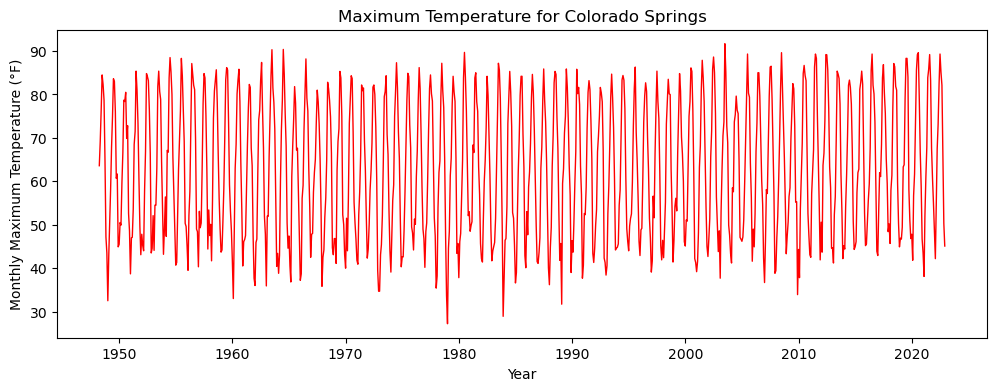

In [6]:
# plot maxT versus time with a red line
plt.figure(figsize=[12,4])
plt.plot(year_month, maxT, 'r', linewidth=1)

# add a title and axes labels (with units)
plt.title('Maximum Temperature for Colorado Springs')
plt.xlabel('Year')
plt.ylabel('Monthly Maximum Temperature (°F)')

# save the figure
plt.savefig('Lab0_CO_Springs_MonthlyMaxT.png', bbox_inches='tight')

**[6pts] Generate additional line plots of Colorado Springs weather data:**

Now plot monthly mimumum temperature, precipitation and snowfall [2pts for each plot]: 
- Include monthly maximum and minimum temperature in the same figure, but vary the line color (e.g., red for maximum temperature, blue for minimum temperature) to distinguish the two datasets.
- Plot precipitation and snowfall as separate figures.
- Add titles, axes labels, and units to all 3 plots
- Set the `linewidth=1` in all plots

Use the same figure size as above so all of your plots are consistent. Recall that: `plt.figure(figsize=[12,4])` will generate a 12x4 figure. 

Feel free to experiment with other plotting features like the line color, line style, markers versus no markers, etc. The goal is to practice using matplotlib to produce high-quality, easy to interpret figures!

Save your figures as:
- `Lab0_CO_Springs_MonthlyMaxMinT.png`
- `Lab0_CO_Springs_MonthlyPrecip.png`
- `Lab0_CO_Springs_MonthlySnow.png`

<span style='color:Red'> **Insert cells below using the `+` icon.** </span> To help keep your code organize, it is recommended that each figure is generated in a separate cell.

**<span style='color:Red'> Insert a cell below (`+`). Plot monthly maximum and minimum temperature versus time: </span>** 

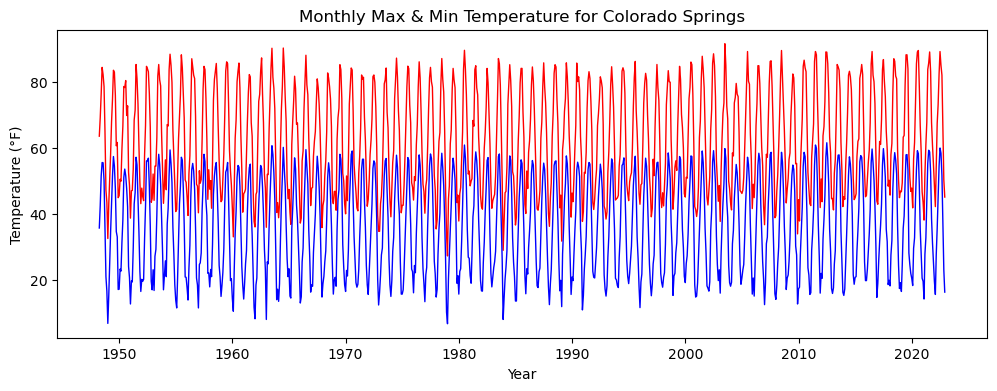

In [7]:
# plot maximum T (red line) and minimum T (blue line) versus time, set linewidth=1
plt.figure(figsize=[12,4])
plt.plot(year_month, df['maximumT'], 'r', linewidth=1)
plt.plot(year_month, df['minimumT'], 'b', linewidth=1)

# add a title and axes labels (with units)
plt.title('Monthly Max & Min Temperature for Colorado Springs')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')

# save the figure
plt.savefig('Lab0_CO_Springs_MonthlyMaxMinT.png', bbox_inches='tight')

**<span style='color:Red'> Insert a cell below (`+`). Plot monthly precipitation versus time: </span>**

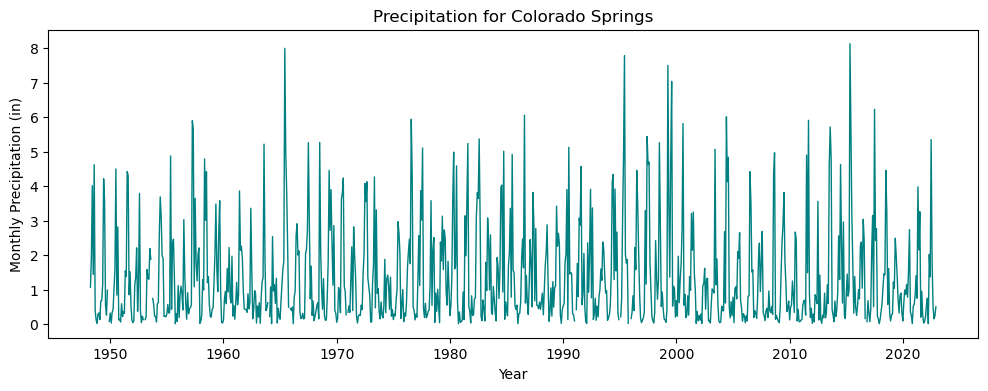

In [8]:
# plot precipitation versus time, change the line color, and set linewidth=1
plt.figure(figsize=[12,4])
plt.plot(year_month, df['precipitation'], 'teal', linewidth=1)

# add a title and axes labels (with units)
plt.title('Precipitation for Colorado Springs')
plt.xlabel('Year')
plt.ylabel('Monthly Precipitation (in)')

# save the figure
plt.savefig('Lab0_CO_Springs_MonthlyPrecip', bbox_inches='tight')

**<span style='color:Red'> Insert a cell below (`+`). Plot monthly snowfall versus time: </span>**

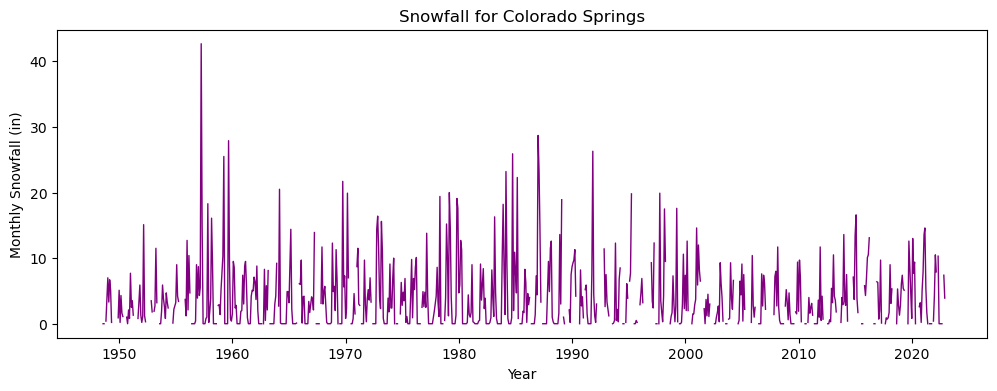

In [9]:
# plot snowfall versus time, change the line color, set linewidth=1
plt.figure(figsize=[12,4])
plt.plot(year_month, df['snowfall'], 'purple', linewidth=1)

# add a title and axes labels (with units)
plt.title('Snowfall for Colorado Springs')
plt.xlabel('Year')
plt.ylabel('Monthly Snowfall (in)')

# save the figure
plt.savefig('Lab0_CO_Springs_MonthlySnow', bbox_inches='tight')

**Answer the following questions using Python functions.**

1. [1pt] What was the highest maximum monthly temperature recorded over the period of observation? 
2. [1pt] What was the lowest maximum monthly temperature recorded over the period of observation? 
3. [1pt] What was the lowest minimum monthly temperature recorded over the period of observation? 
4. [1pt] What was the highest monthly snowfall amount over the period of observation?

***Hints:***
- Python has functions that calculate maximum and minimum values. You can use `numpy.nanmax()` and `numpy.nanmin()` if the data set has mising values (NaNs).
- Use `print()` to display your answers.

**<span style='color:Red'>Insert a cell below using the `+` and add print statements to display the answers to the questions.</span>**

In [10]:
# highest maximum temperature
print('Highest maximum temperature:', np.nanmax(df['maximumT']), 'deg F, in', df['Year_Month'][np.argmax(df['maximumT'])+1])

# lowest maximum temperature and minimum temperature
print('Lowest maximum temperature:', np.nanmin(df['maximumT']), 'deg F, in', df['Year_Month'][np.argmin(df['maximumT'])+1])
print('Lowest minimum temperature:', np.nanmin(df['minimumT']), 'deg F, in', df['Year_Month'][np.argmin(df['minimumT'])+1])

# max snow accumulation
print('Max snow:', np.nanmax(df['snowfall']), 'in., in', df['Year_Month'][np.argmax(df['snowfall'])+1])

Highest maximum temperature: 91.7 deg F, in 2003-07-01 00:00:00
Lowest maximum temperature: 27.2 deg F, in 1979-01-01 00:00:00
Lowest minimum temperature: 6.6 deg F, in 1979-01-01 00:00:00
Max snow: 42.7 in., in 1957-04-01 00:00:00


---
## Calculate the average seasonal cycle for Colorado Springs

Which month *on average* has the highest maximum temperatures? Which month has the most rain? What about the most snow? Can you easily answer this based on the time series plots? The answer is *probably not*. There is over 70 years of data and there are year-to-year fluctuations. It's hard to tell based on the time axis. Instead, we can calculate the average January value, the average February value, the average March value, ..., etc. The average month-to-month changes throughout the year is the average seasonal cycle, or the climatology.

**[4pts] Calculate the average seasonal cycle:**

Calculate the average monthly values and the standard deviation for the full observational record. This will be accomplished using the [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) operation that involves splitting the object, applying a function, and combining the results. This is useful for grouping large amounts of data and computing operations on these groups. 

To group the DataFrame with Colorado Springs weather data, use the syntax: `df.groupby(df['Year_Month'].dt.month)`. This says to group the data by `month`. Then you can calculate the mean and standard deviation of the grouped DataFrame. 

***Hint:*** `.mean()` *and* `.std()` *methods can be performed on Pandas DataFrames.*

**[9pts, 3pts for each subpanel] Plot the results:**

Plot the average monthly values and the standard deviation for the full observational record. Your final figures will have month (1-12) on the x-axis and the average monthly values on the y-axis for each Series (*remember that individual columns can be accessed using brackets[], for example `df['maximumT']` will give you the 'maximum temperature' in the df DataFrame*). 

Plot the results for maximum temperature, minimum temperature, precipitation, and snowfall. A variable `months` will already be defined for you: `months = np.arange(1,13,1)`, where 1 = January, 12 = December.

- Plot minimum and maximum temperature on the same figure as lines with markers. For example use the syntax: `plt.plot(x,y, 'o-').` Where x is months, and y is the average monthly value for a specified Series (e.g., . Be sure to indicate which line is which either by using different colors or adding a legend.
- Include the standard deviation as shading on the temperature plot only. This can be accomplished using `fill_between()`. Set the transparency of the shading `alpha=0.8`
- Plot precipitation and snowfall as bar plots. Set the transparency (alpha) to 0.8 `plt.bar(x, y, alpha=0.8)`. It is recommended that you use a consistent color scheme as the time series plots.

Combine your climatology plots for each panel into 1 figure with 3 subplots: One panel for maximum and minimum temperature, one panel for precipitation, and one panel for snowfall. Some pseudocode is provided below to help get you started with defining the figure and axes. `fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = [14, 4])` will define a figure with three axes (ax1, ax2, ax3).

```
# generate a 3 panel figure (max/min temperature combined, precip, snowfall) 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = [14, 4])

# average monthly min/max temperature as a line plot
ax1.plot()
...add your other code here (e.g., shading, titles, axes labels)...

# average monthly precipitation as a bar plot
ax2.bar()
...add your other code here...

# average monthly snowfall as a bar plot
ax3.bar()
...add your other code here...
```

Add titles, label all axes and include units with the y-axes. 

**Save your figure:**

Save your figure as `Lab0_CO_Springs_MonthlyClimatology.png`.

**Check your work:**

After you generate all your figures, you can compare your results to the reported [climatology values for Colorado Springs](https://www.usclimatedata.com/climate/colorado-springs/colorado/united-states/usco0078). The data reported on this website is not from the same airport weather station, so do not expect an exact match. However, the magnitudes of the values will be similar.

In [11]:
# This cell does not need to be modified
# NumPy array with values for the calendar months (January = 1, December = 12), plot these values on the x-axis
months = np.arange(1,13,1)

**<span style='color:Red'> Insert cell(s) below (`+`) </span>. Add your code for calculating the seasonal cycle and generating the figure.**

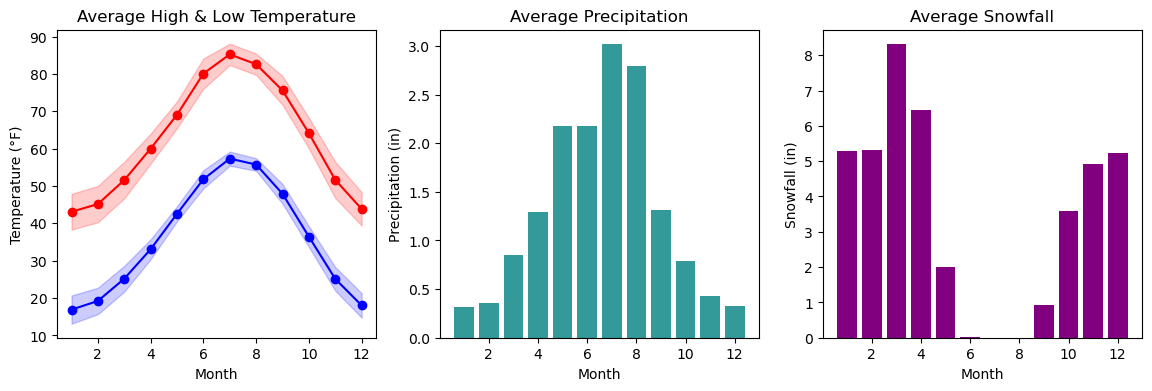

In [12]:
# calculate the average for each month and the standard deviation, output is a DataFrame
df_clim = df.groupby(df['Year_Month'].dt.month).mean()
df_climSD = df.groupby(df['Year_Month'].dt.month).std()

# seasonal cycle of maximum temperature and standard deviation
maxT_clim = df_clim['maximumT']
maxT_SD = df_climSD['maximumT']

# seasonal cycle of minimum temperature and standard deviation
minT_clim = df_clim['minimumT']
minT_SD = df_climSD['minimumT']

# seasonal cycle of precipitation (standard deviation not required)
precip_clim = df_clim['precipitation']

# seasonal cycle of snowfall (standard deviation not required)
snow_clim = df_clim['snowfall']

# generate a 3 panel figure (max/min temperature, precip, snowfall) 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = [14, 4])

# average monthly min/max temperature as a line plot
ax1.plot(months, maxT_clim, 'o-', color='r')
ax1.fill_between(months, maxT_clim-maxT_SD, maxT_clim+maxT_SD, color='r', alpha=0.2)

ax1.plot(minT_clim, 'o-', color='b')
ax1.fill_between(months, minT_clim-minT_SD, minT_clim+minT_SD, color='b', alpha=0.2)

ax1.set_ylabel('Temperature (°F)')
ax1.set_xlabel('Month')
ax1.set_title('Average High & Low Temperature')

# average monthly precipitation as a bar plot
ax2.bar(months, precip_clim, alpha=0.8, color='teal')
ax2.set_title('Average Precipitation')
ax2.set_ylabel('Precipitation (in)')
ax2.set_xlabel('Month')

# average monthly snowfall as a bar plot
ax3.bar(months, snow_clim, color='purple')
ax3.set_title('Average Snowfall')
ax3.set_ylabel('Snowfall (in)')
ax3.set_xlabel('Month')

# save the figure
plt.savefig('Lab0_CO_Springs_MonthlyClimatology.png', bbox_inches='tight')

**Interpret your figures:** You may visually inspect the graphs to determine the calendar month, but must use Python functions to print the precise values. 
1. [1pt] Which month on average has the warmest monthly maximum temperature? What is the value? 
2. [1pt] Which month on average has the coldest monthly minimum temperature? What is the value?
3. [1pt] Which month on average received the most precipitation? What about snowfall? What are the values?
4. [1pt] Are the values you calculated consistent with your experiences as a student living in Colorado?

**<span style='color:Red'> Insert a cell below (`+`) </span>**, perform the calculations, and include print statements with your answers. For example:

```
# highest maximum temperature
print('<enter month here> on average has the warmest monthly maximum temperature.')
print('Avg. warmest monthly maximum temperature:', '<add your code here>', '<add units here>')

# coldest monthly minimum temperatire
print('<enter month here> on average has the coldest monthly maximum temperature.')
print('Avg. coldest monthly minimum temperature:', '<add your code here>', '<add units here>')

...continue with the other questions here...
```

In [13]:
# average warmest monthly maximum temperature

# highest maximum temperature
print('July on average has the warmest monthly maximum temperature.')
print('Avg. warmest monthly maximum temperature:', np.nanmax(df_clim['maximumT']), 'deg F')

# coldest monthly minimum temperatire
print('December on average has the coldest monthly maximum temperature.')
print('Avg. coldest monthly minimum temperature:', np.nanmin(df_clim['minimumT']), 'deg F')

# most precipitation
print('July on average receives the most precipitation.')
print('Average monthly precipitation:', np.nanmax(df_clim['precipitation']), 'in')

# max snow accumulation
print('March on average receives the most snowfall.')
print('Average monthly snowfall:', np.nanmax(df_clim['snowfall']), 'in.')

# consistent with expectation
print('These answers are consistent with my expectations because...')

July on average has the warmest monthly maximum temperature.
Avg. warmest monthly maximum temperature: 85.24333 deg F
December on average has the coldest monthly maximum temperature.
Avg. coldest monthly minimum temperature: 16.903664 deg F
July on average receives the most precipitation.
Average monthly precipitation: 3.015472 in
March on average receives the most snowfall.
Average monthly snowfall: 8.306795 in.
These answers are consistent with my expectations because...


---
## Calculate total annual precipitation and snowfall 

**[4pts] <span style='color:Red'> Insert a cell below (`+`) </span> and calculate the total annual precipitation and snowfall versus time (2 pts for each variable).** 

This is the sum of precipitation or snowfall from January-December every year.  

**<span style='color:Red'> Insert a cell below (`+`) </span>**, and define two variables called `annPrecip` and `annSnow`.

*Hint: Use the `df.groupby` and `.sum()` methods on the monthly `df` DataFrame. This is very similar to the steps above to calculate the monthly means and standard deviations, except you will need to change the time step to year and calculate the sum.*

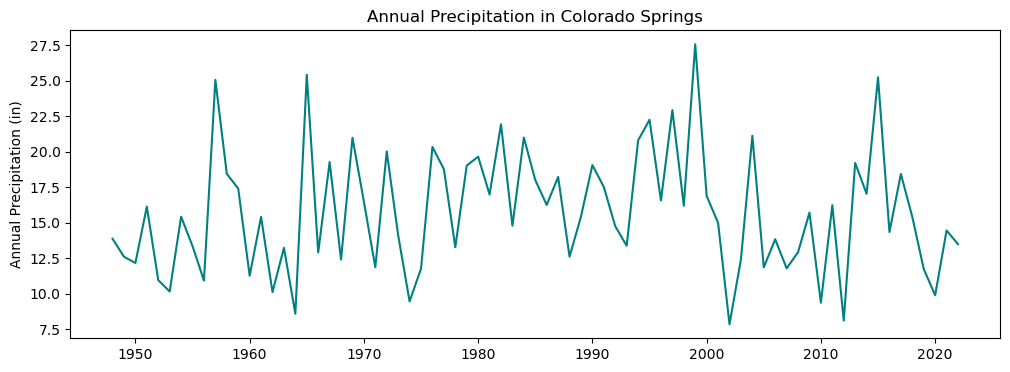

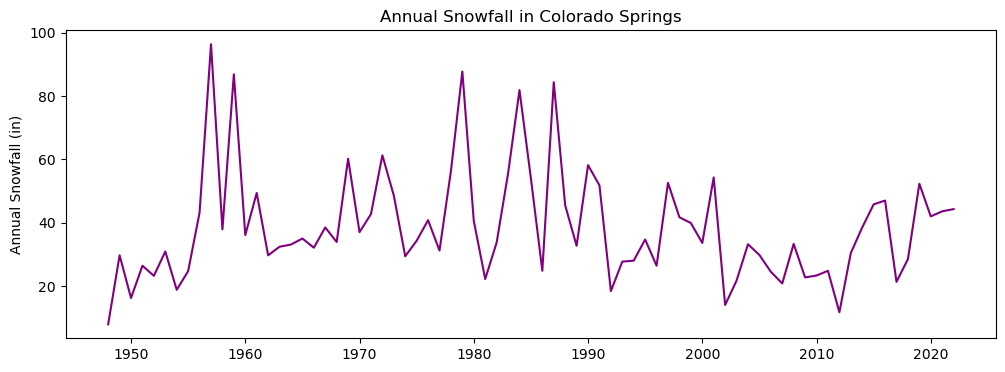

In [14]:
# calculate annual precipitation (January-December sum) through time 
annPrecip = df.groupby(df['Year_Month'].dt.year)['precipitation'].sum()
annSnow = df.groupby(df['Year_Month'].dt.year)['snowfall'].sum()

# **NOTE: Students do not need to plot the time series here (this will be done later). The plots are included here for reference.**
# plot the time series 
plt.figure(figsize=[12,4])
plt.plot(annPrecip, 'teal')
plt.ylabel('Annual Precipitation (in)')
plt.title('Annual Precipitation in Colorado Springs')

# save the figure
plt.savefig('Lab0_CO_Springs_AnnualPrecip', bbox_inches='tight')

# plot the time series
plt.figure(figsize=[12,4])
plt.plot(annSnow, 'purple')
plt.ylabel('Annual Snowfall (in)')
plt.title('Annual Snowfall in Colorado Springs')

# save the figure
plt.savefig('Lab0_CO_Springs_AnnualSnow', bbox_inches='tight')

**[2pts] <span style='color:Red'> Insert a cell below (`+` icon) </span>** and calculate on average how much *precipitation* does the Colorado Springs Airport receive annually? Please report the mean **and** the standard deviation with the approrpiate units.

After performing the calculation, print the values using the following code:
```
print('Avg. precip.', <enter your avg. variable>, '±', <enter your std. dev. variable>, 'in')
```

In [15]:
# average annual precipitation and standard deviation 
avgPrecip = annPrecip.mean()
avgPrecip_SD = annPrecip.std()

# print the results
print('Avg. precip.', avgPrecip, '±', avgPrecip_SD, 'in')

Avg. precip. 15.731348 ± 4.366295337677002 in


---
## Calculate annual means

Although monthly records are valuable for a variety of purposes, we are now going to shift our focus to average annual temperatures. The annual mean is calculated for you below. The output is a DataFrame called `df_annual`. 

In [16]:
# calculate the annual annual mean
df_annual = df.groupby(df['Year_Month'].dt.year).mean()
df_annual

,Year_Month,maximumT,minimumT,precipitation,snowfall
Year_Month,,,,,
1948,1948-06-16 08:00:00,67.843750,40.375000,1.541543,1.579980
1949,1949-06-16 12:00:00,61.398438,35.014648,1.146224,3.712677
1950,1950-06-16 12:00:00,62.804688,35.236980,1.014173,1.800103
1951,1951-06-16 12:00:00,59.968750,33.417316,1.344981,2.933092
1952,1952-06-16 08:00:00,62.080730,35.401043,0.913406,3.314453
...,...,...,...,...,...
2018,2018-06-16 12:00:00,65.296875,37.091145,1.284246,3.562744
2019,2019-06-16 12:00:00,63.815105,35.684895,0.979167,5.811198
2020,2020-06-16 08:00:00,66.453125,37.307293,0.824254,4.666422


**Subset the data:**
The full data set begins in April 1948 so skip plotting the first year of data because it is missing 3 months. Start the time series plots at 1949. Use indexing to accomplish this - to plot all but the first element in a Series use the following syntax: `SeriesName[1:]`.

**Plot annual time series:**
Generate a figure with 4 subplots. 
- You will need to define four axes using the following code: `fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= [20,4])`. The figure size is increased to accomodate the additional subplots. 
- ax1: Plot the time series for average annual maximum temperature
- ax2: Plot the average annual minimum temperature.
- ax3: Plot the total annual precipitation (the January-December sum defined in the previous section).
- ax4: Plot the total annual snowfall (the January-December sum defined in the previous section).
- Add titles and axes labels to all subplots as appropriate.
- Save the figure as `Lab0_CO_Springs_Annual.png`.

**[10pts] <span style='color:Red'> Insert a cell below (`+`) and add your code to generate annual time series plots [2.5pts per plot]. </span>** Remember to skip plotting the annual average for 1948 and start your time series in 1949.

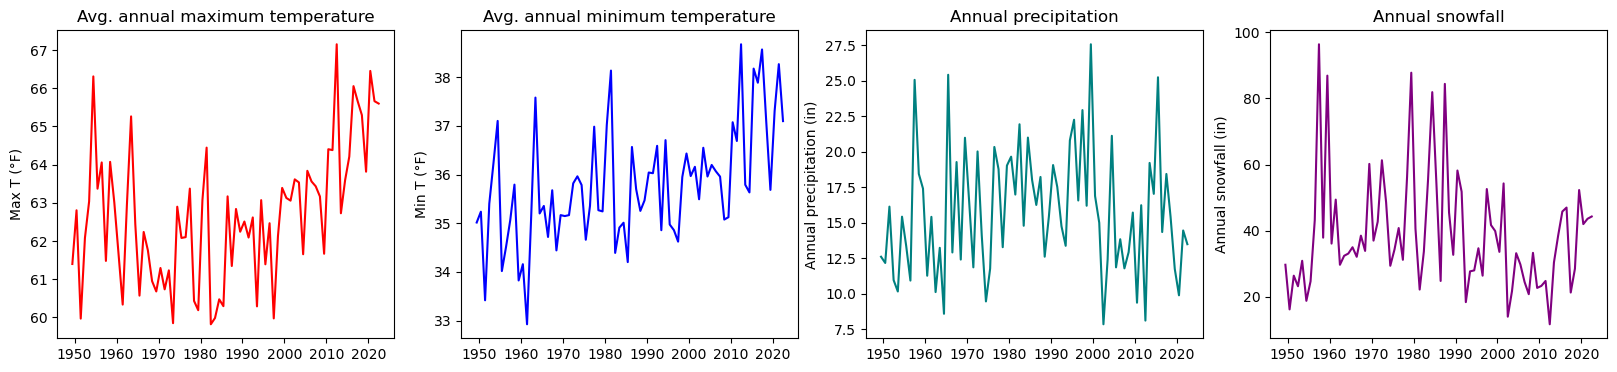

In [17]:
# plot annual time series. Skip plotting the first year since 1948 is missing data for January-March
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= [20,4])

# maximum T
ax1.plot(df_annual['Year_Month'][1:], df_annual['maximumT'][1:], 'r')
ax1.set_title('Avg. annual maximum temperature')
ax1.set_ylabel('Max T (°F)')

# minimum T
ax2.plot(df_annual['Year_Month'][1:], df_annual['minimumT'][1:], 'b')
ax2.set_title('Avg. annual minimum temperature')
ax2.set_ylabel('Min T (°F)')

# total annual precipitation
ax3.plot(df_annual['Year_Month'][1:], annPrecip[1:], 'teal')
ax3.set_title('Annual precipitation')
ax3.set_ylabel('Annual precipitation (in)')

# total annual snowfall
ax4.plot(df_annual['Year_Month'][1:], annSnow[1:], 'purple')
ax4.set_title('Annual snowfall')
ax4.set_ylabel('Annual snowfall (in)')

# save figure
plt.savefig('Lab0_CO_Springs_AnnualAvg.png', bbox_inches='tight')

---
## Colorado Springs Weather & Climate Synthesis Questions [13pts]

To answer the following questions, please consult your Lab 0 figures and draw upon your knowledge of the week 1 course material. 

1. [2pts] Colorado’s climate is governed by five major factors. Describe at least 3 of these factors and how they influence the local climate of Colorado Springs.
2. [2pts] How would the seasons in Colorado Springs be affected if the tilt of the Earth’s axis increased from 23.5° to 40°? Qualitatively, how would this change the climatology plots you generated in this lab?
3. [2pts] Why does the surface temperature often increase on a clear, calm night as a low cloud moves overhead?
4. [2pts] Low clouds that touch the ground (fog) often fill the valleys below Pikes Peak. This is especially common during the morning and the winter. Why? To answer this question, draw on your knowledge of atmospheric thermodynamics, including air temperature, air density, evaporation/condensation, and saturation.
5. [1pt] Why does the valley fog typically dissipate by mid-day?
6. [2pts] We will not do formal trend analysis in this lab, but qualitatively what are the general long-term trends that you observe in the annual time series for each climate variable?
7. [2pts] Under higher IPCC emissions scenarios, average annual global temperatures could increase by 2.9°C (5.2 °F) by 2100 relative to today (the Earth has already experienced around ~1.1°C of warming compared to preindustrial levels). How would an additional 2.9°C of warming locally impact water resources in the Rocky Mountain region. There are many ways to answer this question and receive full credit – consistency of thought is what is important.  

**<span style='color:Red'> Insert a cell below (`+`) </span> and select 'Markdown' as the cell type.** Type your responses to each question and run the cell to display the formatted text.

## Congratulations! You completed your first EV333 Python lab! 

**To submit your lab:**
1. Run the entire Notebook from the beginning and check that it generates all figures and does not have any errors.
2. Save your Jupyter Notebook and upload it to Canvas with the following file name: *LastName_FirstName_EV333_Lab0.ipynb*